In [1]:
using ReinforcementLearning, ReinforcementLearningEnvironments

In [2]:
using RLIntro
using RLIntro.BlackJack

In [3]:
env = BlackJackEnv()

ns, na = length(observation_space(env)), length(action_space(env))

(220, 2)

In [4]:
stick_action = findall(x -> x == :stick, BlackJack.ACTIONS)[]

table = fill(1, size(BlackJack.INDS)...)
table[:, 10:11, :] .= stick_action
table = reshape(table, :);

In [5]:
agent = Agent(
    VBasedPolicy(
        learner=MonteCarloLearner(approximator=TabularVApproximator(ns)),
        f=obs -> table[get_state(obs)]),
    episode_RTSA_buffer()
);

In [6]:
run(agent, env, StopAfterEpisode(10000))

Progress:   0%|█                                        |  ETA: 2:41:49
4m  TRAINING/EPISODE:  0
Progress:   0%|█                                        |  ETA: 2:01:19
4m  TRAINING/EPISODE:  1
Progress:  31%|█████████████                            |  ETA: 0:00:03
4m  TRAINING/EPISODE:  1968
Progress:  81%|██████████████████████████████████       |  ETA: 0:00:00
4m  TRAINING/EPISODE:  5216
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
  TRAINING/EPISODE:  6394


EmptyHook()

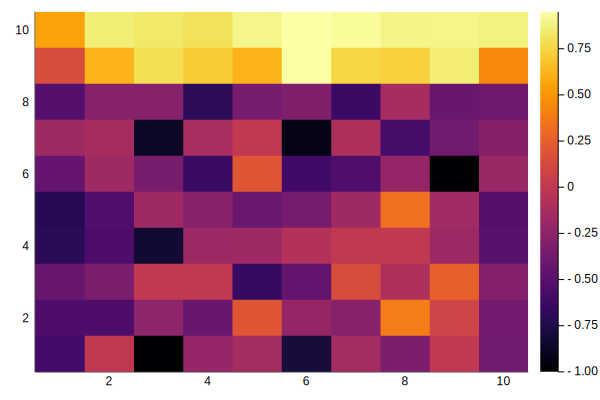

In [7]:
using Plots
V = reshape(agent.π.learner.approximator.table, size(BlackJack.INDS)...)
V_with_usable_ace = V[1, 2:11, :]
V_without_usable_ace = V[2, 2:11, :]

heatmap(V_with_usable_ace)

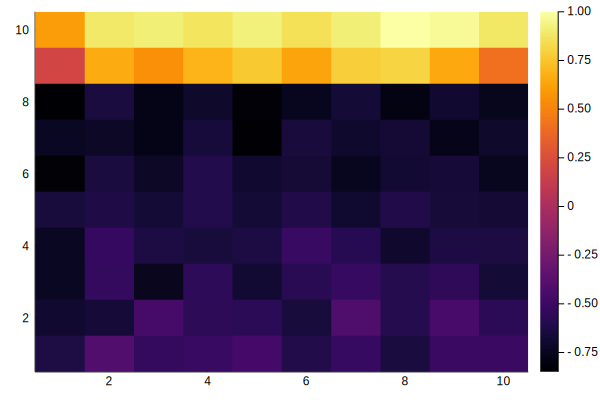

In [8]:
heatmap(V_without_usable_ace)

In [9]:
agent = Agent(
    VBasedPolicy(
        learner=MonteCarloLearner(approximator=TabularVApproximator(ns)),
        f=obs -> table[get_state(obs)]),
    episode_RTSA_buffer()
);
run(agent, env, StopAfterEpisode(500000))

Progress:   0%|█                                        |  ETA: 0:00:56
4m  TRAINING/EPISODE:  568
Progress:   1%|█                                        |  ETA: 0:00:27
4m  TRAINING/EPISODE:  2496
Progress:   2%|█                                        |  ETA: 0:00:19
4m  TRAINING/EPISODE:  5291
Progress:   3%|██                                       |  ETA: 0:00:16
4m  TRAINING/EPISODE:  8096
Progress:   3%|██                                       |  ETA: 0:00:15
4m  TRAINING/EPISODE:  11031
Progress:   4%|██                                       |  ETA: 0:00:14
4m  TRAINING/EPISODE:  13535
Progress:   5%|███                                      |  ETA: 0:00:13
4m  TRAINING/EPISODE:  16331
Progress:   6%|███                                      |  ETA: 0:00:13
4m  TRAINING/EPISODE:  19047
Progress:   7%|███                                      |  ETA: 0:00:13
4m  TRAINING/EPISODE:  22290
Progress:   8%|████                                     |  ETA: 0:00:12
4m  TRAINING/EPISODE:  2

4m  TRAINING/EPISODE:  211547
Progress:  67%|████████████████████████████             |  ETA: 0:00:04
4m  TRAINING/EPISODE:  214571
Progress:  68%|████████████████████████████             |  ETA: 0:00:03
4m  TRAINING/EPISODE:  218314
Progress:  69%|█████████████████████████████            |  ETA: 0:00:03
4m  TRAINING/EPISODE:  221673
Progress:  70%|█████████████████████████████            |  ETA: 0:00:03
4m  TRAINING/EPISODE:  225603
Progress:  71%|██████████████████████████████           |  ETA: 0:00:03
4m  TRAINING/EPISODE:  228564
Progress:  72%|██████████████████████████████           |  ETA: 0:00:03
4m  TRAINING/EPISODE:  232306
Progress:  73%|███████████████████████████████          |  ETA: 0:00:03
4m  TRAINING/EPISODE:  235459
Progress:  75%|███████████████████████████████          |  ETA: 0:00:03
4m  TRAINING/EPISODE:  239423
Progress:  76%|███████████████████████████████          |  ETA: 0:00:03
4m  TRAINING/EPISODE:  242530
Progress:  77%|████████████████████████████████     

EmptyHook()

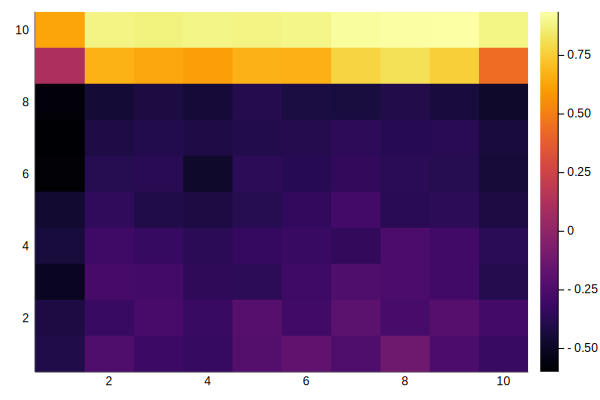

In [10]:
V = reshape(agent.π.learner.approximator.table, size(BlackJack.INDS)...)
V_with_usable_ace = V[1, 2:11, :]
V_without_usable_ace = V[2, 2:11, :]

heatmap(V_with_usable_ace)

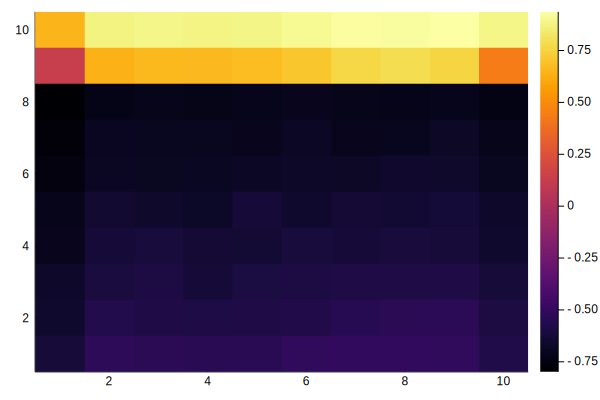

In [11]:
heatmap(V_without_usable_ace)